In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)

df['target'] = data.target

# df
df.drop(['mean texture','mean perimeter',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],inplace=True,axis=1)
df

,mean radius,mean area,target
0,17.99,1001.0,0
1,20.57,1326.0,0
2,19.69,1203.0,0
3,11.42,386.1,0
4,20.29,1297.0,0
...,...,...,...
564,21.56,1479.0,0
565,20.13,1261.0,0
566,16.60,858.1,0
567,20.60,1265.0,0


In [4]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(
    df.drop('target',axis=1),
    df['target'],
    test_size=0.3,
    random_state=0
)
x_train.shape , x_test.shape

((398, 2), (171, 2))

## RobustSCaler method that helps us to scale the outliers 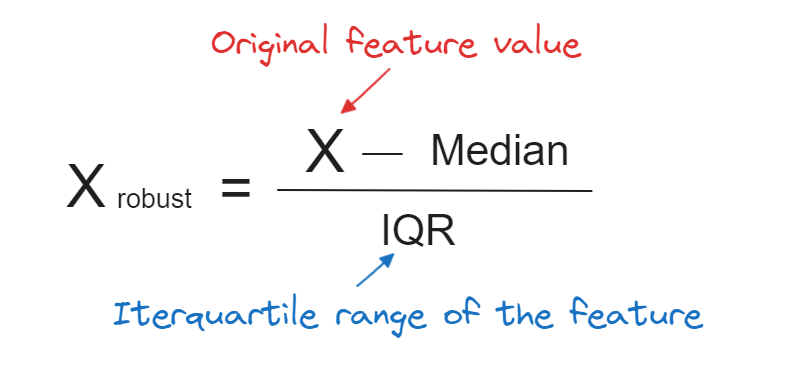

In [5]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(x_train)

X_trained_Scale = scaler.transform(x_train)
X_test_Scale = scaler.transform(x_test)

X_trained_Scale

array([[-0.448     , -0.40011149],
       [-0.69415385, -0.5968922 ],
       [-0.26092308, -0.24569716],
       [ 1.23076923,  1.372866  ],
       [-1.55790769, -1.12870183],
       [-0.8672    , -0.70782524],
       [-0.05661538, -0.07929761],
       [-0.53169231, -0.46421852],
       [ 0.44061538,  0.45808654],
       [ 1.30953846,  1.50386733],
       [-0.40369231, -0.36861543],
       [ 0.04430769,  0.03498014],
       [ 0.07384615,  0.09546373],
       [-0.07876923, -0.095185  ],
       [-0.68923077, -0.59717093],
       [ 0.35692308,  0.33516828],
       [-0.18953846, -0.20110097],
       [ 1.45230769,  1.68225211],
       [-0.63015385, -0.5383597 ],
       [-0.77292308, -0.65932688],
       [ 1.216     ,  1.37007874],
       [-0.07630769, -0.07985506],
       [-0.59815385, -0.52832555],
       [-0.75323077, -0.62504355],
       [ 1.58030769,  1.83276427],
       [ 2.45661538,  3.16786287],
       [-0.02707692, -0.01909275],
       [ 0.08123077,  0.07483799],
       [ 0.41353846,

In [6]:
X_trained_Scale = pd.DataFrame(X_trained_Scale, columns=x_test.columns)
X_test_Scale  = pd.DataFrame(X_test_Scale , columns=x_test.columns)

In [7]:
np.round(X_trained_Scale.describe(),1)

,mean radius,mean area
count,398.0,398.0
mean,0.2,0.3
std,0.9,1.0
min,-1.6,-1.1
25%,-0.4,-0.4
50%,0.0,0.0
75%,0.6,0.6
max,3.6,5.4


In [8]:
x_train.describe()

,mean radius,mean area
count,398.000000,398.000000
mean,14.185500,661.859045
std,3.598618,366.558262
min,6.981000,143.500000
25%,11.710000,420.350000
50%,13.310000,548.450000
75%,15.772500,779.125000
max,28.110000,2501.000000


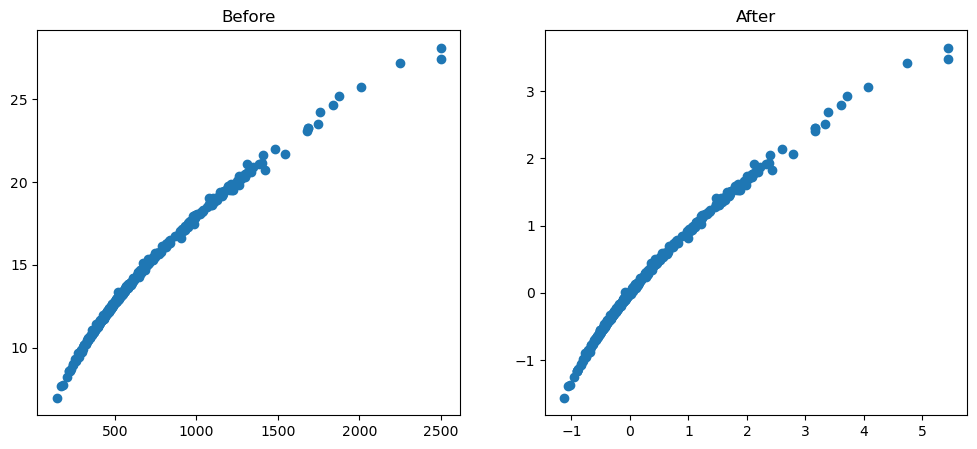

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['mean area'],x_train['mean radius'], c=y_train)
ax1.set_title('Before')
ax2.scatter(X_trained_Scale['mean area'],X_trained_Scale['mean radius'], c=y_train)
ax2.set_title('After')
plt.show()

In [ ]:
df['mean radius'].median()

13.37

In [ ]:
['mean radius'].median()

13.4